In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [9]:
pwd

'/home/akash/Desktop/Pers/Regression_Project/regression'

In [10]:
os.listdir()


['finalized_model_Random-Forest.sav',
 'pyvenv.cfg',
 'pairplot.png',
 'disb_2.png',
 'boxplot.png',
 'y_train.csv',
 'Distribution.png',
 'include',
 'Applying_Boxcox.png',
 'Predciting_sales.ipynb',
 'x_test.csv',
 'lib64',
 '.ipynb_checkpoints',
 'Predciting_sales_final.ipynb',
 'Correlation-Matrix.png',
 'y_test',
 'lib',
 'Applying_log.png',
 'finalized_model_Random-Forest_after_tuning.sav',
 'x_train.csv',
 'Applying_exp.png',
 'bin',
 'finalized_model.sav',
 'Data_HSS.csv']

In [79]:
df = pd.read_csv('Data_HSS.csv')

In [80]:
df.describe().round(2)

,TV,Radio,Social Media,Sales
count,4562.00,4568.00,4566.00,4566.00
mean,54.07,18.16,3.32,192.47
std,26.13,9.68,2.21,93.13
min,10.00,0.00,0.00,31.20
25%,32.00,10.53,1.53,112.32
50%,53.00,17.86,3.06,189.23
75%,77.00,25.65,4.81,272.51
max,100.00,48.87,13.98,364.08


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [82]:
df.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [83]:
df.shape

(4572, 5)

In [84]:
#Dropping rows where target variable is null.
df = df[df['Sales'].notna()]

In [85]:
df.isna().sum(), df.shape

(TV              10
 Radio            4
 Social Media     6
 Influencer       0
 Sales            0
 dtype: int64,
 (4566, 5))

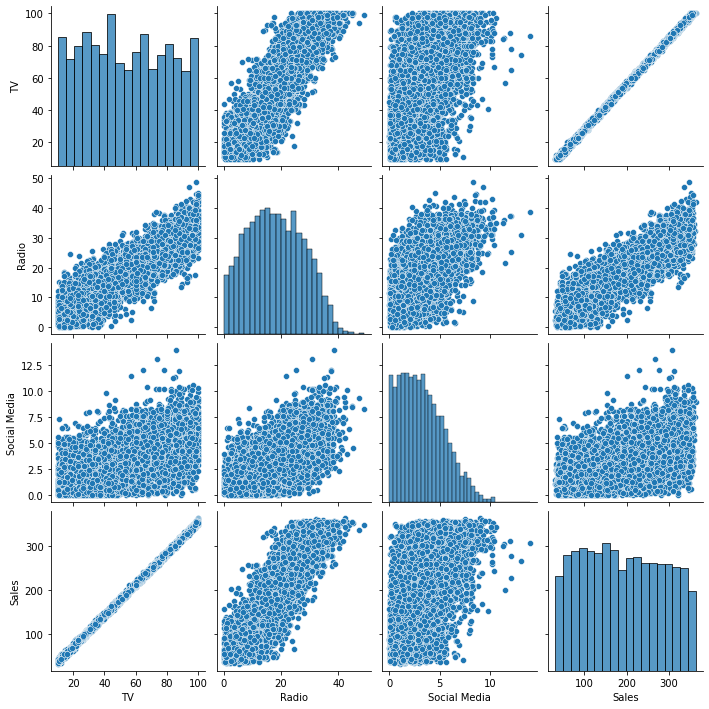

In [86]:
## Plotting
sns.pairplot(df)
plt.savefig('pairplot.png')

In [87]:
## Encoding of categorical variable
df.Influencer.nunique()

4

In [88]:
df.Influencer.unique()

array(['Mega', 'Micro', 'Nano', 'Macro'], dtype=object)

In [91]:
df.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [96]:
dummy = pd.concat([df[['TV', 'Radio', 'Social Media']],pd.get_dummies(df.Influencer, drop_first=False)],axis=1)

In [97]:
dummy.corr()

,TV,Radio,Social Media,Macro,Mega,Micro,Nano
TV,1.000000,0.869265,0.527904,0.022008,-0.012901,-0.005287,-0.003600
Radio,0.869265,1.000000,0.607415,0.010061,-0.005620,0.003830,-0.008207
Social Media,0.527904,0.607415,1.000000,0.012108,0.012899,-0.012963,-0.011986
Macro,0.022008,0.010061,0.012108,1.000000,-0.332131,-0.331362,-0.328477
Mega,-0.012901,-0.005620,0.012899,-0.332131,1.000000,-0.338218,-0.335273
Micro,-0.005287,0.003830,-0.012963,-0.331362,-0.338218,1.000000,-0.334496
Nano,-0.003600,-0.008207,-0.011986,-0.328477,-0.335273,-0.334496,1.000000


In [39]:
df.Influencer = df.Influencer.replace(["Nano","Micro","Macro","Mega"],[1,2,3,4])
df.Influencer = df.Influencer.astype(float)

In [61]:
df.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [62]:
df.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            0
dtype: int64

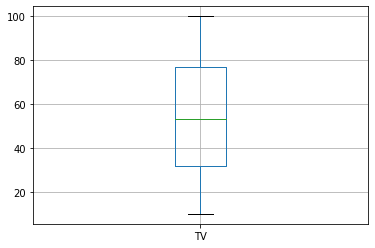

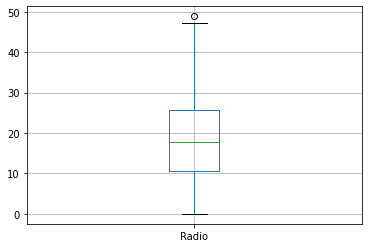

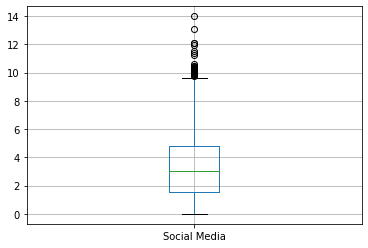

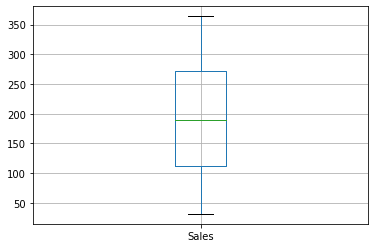

In [63]:
for col in ['TV','Radio','Social Media','Sales']:
    df[[col]].boxplot()
    
    plt.show()

### Correlation

,TV,Radio,Social Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


<AxesSubplot:>

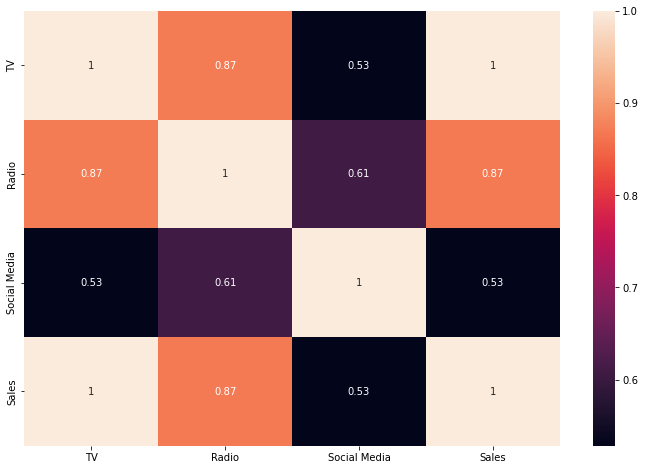

In [14]:
display(df[['TV','Radio', 'Social Media','Sales']].corr())
plt.figure(figsize = (12,8))
sns.heatmap(df[['TV','Radio', 'Social Media','Sales']].corr(),annot=True)

TV and Radio are highly correlated.

Radio is also more correlated with Social Media and less with Sales as compared to TV.

Let's validate our results with VIF to remove multicollinear features. 

### Variance Inflation factor

In [64]:
df_vif = df.copy()
df_vif.fillna(df_vif.mean(),inplace=True)

In [65]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_vif.iloc[:,:-1]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,20.812713,Radio
0,19.633054,TV
2,5.084929,Social Media
3,3.165329,Influencer


In [103]:
dummy.fillna(np.mean(dummy),inplace=True)

In [105]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = dummy.iloc[:,-4:]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
1,0.114187,Mega
2,0.111111,Micro
3,0.099384,Nano
0,0.086530,Macro


In [106]:
X.corr()

,Macro,Mega,Micro,Nano
Macro,1.000000,-0.332131,-0.331362,-0.328477
Mega,-0.332131,1.000000,-0.338218,-0.335273
Micro,-0.331362,-0.338218,1.000000,-0.334496
Nano,-0.328477,-0.335273,-0.334496,1.000000


In [ ]:
## Dropping TV and Radio

In [7]:
# dd = df.copy()
# dd.drop(['TV','Radio'],axis=1,inplace=True)

Radio and TV have very high VIF. 

Let's drop Radio column.

In [40]:
df.drop('Radio',axis=1,inplace=True)

In [5]:
df

,TV,Social Media,Influencer,Sales
0,16.0,2.907983,4.0,54.732757
1,13.0,2.409567,4.0,46.677897
2,41.0,2.913410,4.0,150.177829
3,83.0,6.922304,4.0,298.246340
4,15.0,1.405998,2.0,56.594181
...,...,...,...,...
4567,26.0,0.717090,2.0,94.685866
4568,71.0,6.545573,1.0,249.101915
4569,44.0,5.096192,2.0,163.631457
4570,71.0,1.940873,3.0,253.610411


## Distributions

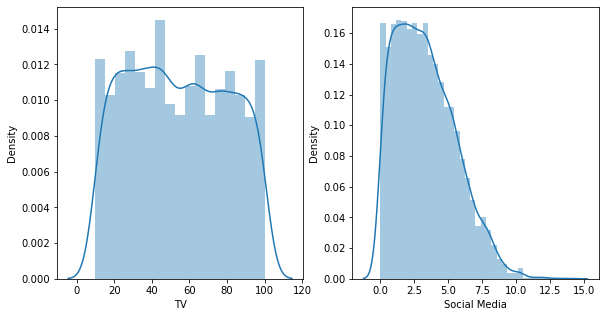

In [225]:

plotnum = 1
plt.figure(figsize=(15,5), facecolor='white')
for col in df.columns[:-2]:
    ax = plt.subplot(1,3,plotnum)
    sns.distplot(df[col])
    plotnum += 1
    plt.savefig('Distribution.png') 
plt.show()

    

In [142]:
from scipy.stats import boxcox

In [78]:
df2 = df[['TV','Social Media']].copy()

In [79]:
df2

,TV,Social Media
0,16.0,2.907983
1,13.0,2.409567
2,41.0,2.913410
3,83.0,6.922304
4,15.0,1.405998
...,...,...
4567,26.0,0.717090
4568,71.0,6.545573
4569,44.0,5.096192
4570,71.0,1.940873


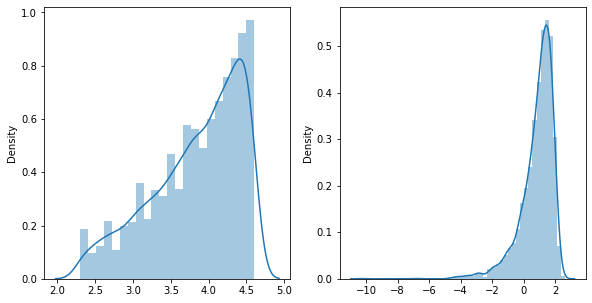

In [231]:
## Applying Boxcox
plotnum = 1
plt.figure(figsize=(15,5))
for col in df2.columns:
    ax = plt.subplot(1,3,plotnum)
    sns.distplot(boxcox(df[col],0))
    plotnum += 1
    plt.savefig('Applying_boxcox.png')
plt.show()


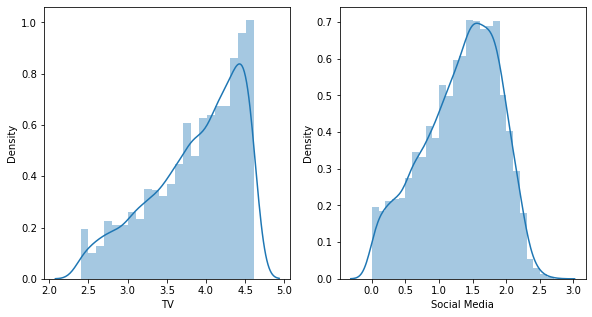

In [233]:
## Applying log
plotnum = 1
plt.figure(figsize=(15,5), facecolor = 'white')
for col in df2.columns:
    ax = plt.subplot(1,3,plotnum)
    sns.distplot(np.log1p(df[col]))
    plotnum += 1
    plt.savefig('Applying_log.png')
plt.show()



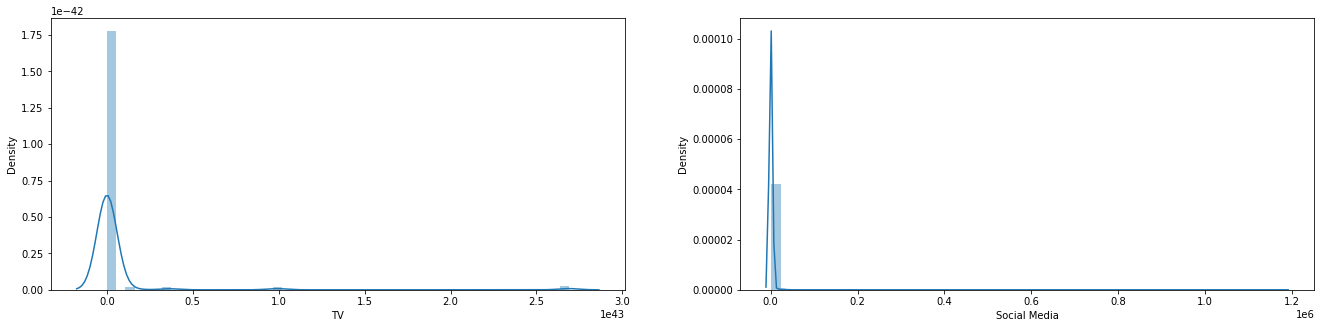

In [80]:
## Applying exp
plotnum = 1
plt.figure(figsize=(35,5), facecolor = 'white')
for col in df2.columns:
    ax = plt.subplot(1,3,plotnum)
    sns.distplot(np.exp(df[col]))
    plotnum += 1
    plt.savefig('Applying_exp.png')
plt.show()

### Splitting into x & y

In [41]:
x = df[['TV','Social Media', 'Influencer']]
y = df[['Sales']]

In [7]:
##Tried dropping TV as VIF was v.high. Tirned out to be a very poor model.

# x = df[['Social Media', 'Influencer']]
# y = df[['Sales']]

### Train-test split

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state= 13) ##11-RF

In [9]:
x_train.dtypes

TV              float64
Social Media    float64
Influencer      float64
dtype: object

In [43]:
x_train.isna().sum()

TV              9
Social Media    4
Influencer      0
dtype: int64

### NaN values Imputation for Radio and Social Media separately on Train and test

In [44]:
x_train['TV'] = np.where(x_train['TV'].isnull()==True,x_test['TV'].mean(),x_train['TV'])
x_train['Social Media'] = np.where(x_train['Social Media'].isna()==True,x_train['Social Media'].mean(),x_train['Social Media'])
x_train['Influencer'] = np.where(x_train['Influencer'].isna()==True,x_train['Influencer'].mean(),x_train['Influencer'])

x_test['TV'] = np.where(x_test['TV'].isna()==True,x_test['TV'].mean(),x_test['TV'])
x_test['Social Media'] = np.where(x_test['Social Media'].isna()==True,x_test['Social Media'].mean(),x_test['Social Media'])
x_test['Influencer'] = np.where(x_test['Influencer'].isna()==True,x_test['Influencer'].mean(),x_test['Influencer'])

In [45]:
x_train.isna().sum()

TV              0
Social Media    0
Influencer      0
dtype: int64

In [15]:
x_train.head()

,TV,Social Media,Influencer
3633,100.0,8.054540,4.0
1905,13.0,2.329491,2.0
3392,30.0,0.516590,1.0
780,100.0,9.351921,2.0
2067,19.0,2.170749,3.0


## Outlier Removal

In [46]:
x2 = x_train.copy()

outlier_dict = {}

percentile_list = [1,2,5,10,25,50,75,90,95,98,99,100]

for i in x_train.columns[:-1]:
    lis = []
    
    for j in percentile_list:
        lis.append(np.percentile(x_train[i],j))
        
    
    outlier_dict[i] = lis
    
outlier_df = pd.DataFrame(outlier_dict)

outlier_df = pd.concat([pd.DataFrame({'Percentile':percentile_list}),outlier_df],axis=1)
display(outlier_df)

,Percentile,TV,Social Media
0,1,11.0,0.047581
1,2,12.0,0.104244
2,5,15.0,0.281415
3,10,19.0,0.606396
4,25,32.0,1.505559
5,50,53.0,3.041673
6,75,76.0,4.767551
7,90,90.0,6.356100
8,95,96.0,7.348636
9,98,99.0,8.226561


99th percentile value for Social Media seems to be a good threshold to remove outliers as there's a huge diffference b/w 99th and 100th percentile.

All values above 8.93 shall be replaced by 8.93 for Social Media.

In [47]:
print(f"Outliers in x_train = {x_train[x_train['Social Media']>8.9318154]['Social Media'].count()}")
print(f"Outliers in x_test = {x_test[x_test['Social Media']>8.931815]['Social Media'].count()}")

Outliers in x_train = 37
Outliers in x_test = 15


In [48]:
## Replacing outliers

x_train['Social Media'] = np.where(x_train['Social Media']>8.931815,8.931815, x_train['Social Media'])
x_test['Social Media'] = np.where(x_test['Social Media']>8.931815,8.931815, x_test['Social Media'])

In [49]:
print(f"Outliers in x_train = {x_train[x_train['Social Media']>8.931815]['Social Media'].count()}")
print(f"Outliers in x_test = {x_test[x_test['Social Media']>8.931815]['Social Media'].count()}")

Outliers in x_train = 0
Outliers in x_test = 0


In [50]:
x_train.isna().sum(),x_test.isna().sum()

(TV              0
 Social Media    0
 Influencer      0
 dtype: int64,
 TV              0
 Social Media    0
 Influencer      0
 dtype: int64)

In [51]:
y_train.isna().sum(),y_test.isna().sum()

(Sales    0
 dtype: int64,
 Sales    0
 dtype: int64)

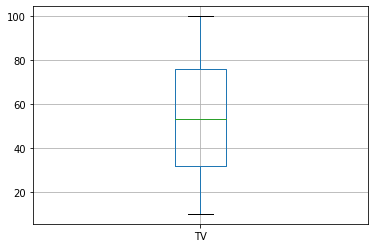

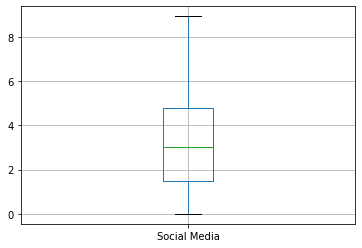

In [64]:
for col in ['TV','Social Media']:
    x_train[[col]].boxplot()
    
    plt.show()

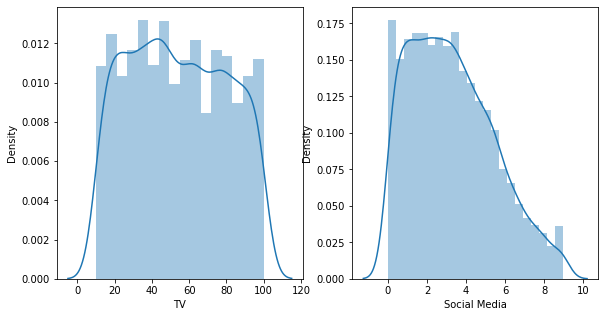

In [66]:

plotnum = 1
plt.figure(figsize=(15,5), facecolor='white')
for col in x_train.columns[:-1]:
    ax = plt.subplot(1,3,plotnum)
    sns.distplot(x_train[col])
    plotnum += 1
    #plt.savefig('Distribution.png') 
plt.show()

    

In [52]:
x_train.to_csv('x_train.csv')
x_test.to_csv('x_test.csv')
y_train.to_csv('y_train.csv')
y_test.to_csv('y_test')

In [62]:
x_train = pd.read_csv('x_train.csv',index_col=0)
x_test = pd.read_csv('x_test.csv',index_col=0)
y_train = pd.read_csv('y_train.csv',index_col=0)
y_test = pd.read_csv('y_test',index_col=0)

In [23]:
x_train.isna().sum(),x_test.isna().sum()

(TV              0
 Social Media    0
 Influencer      0
 dtype: int64,
 TV              0
 Social Media    0
 Influencer      0
 dtype: int64)

Data is ready for model building.

### Model Building

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
# R squared 
from sklearn.metrics import r2_score


In [54]:
##Scaling the data

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)



In [55]:
x_train.shape,y_train.shape

((3652, 3), (3652, 1))

In [56]:
y_train.isna().sum()

Sales    0
dtype: int64

In [57]:
x_train

array([[-0.81131152, -1.15941083, -0.4511767 ],
       [ 0.19371326, -0.18486095,  1.33108106],
       [ 1.73990523,  2.10723732, -0.4511767 ],
       ...,
       [-0.46341833, -0.63133497, -1.34230558],
       [-0.30879913,  0.38759054, -0.4511767 ],
       [ 0.81219005,  1.8348714 , -1.34230558]])

In [58]:

#Fitting different models

def return_best_model_using_R2(x_train,y_train):
    R2 = []
    models = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(),RandomForestRegressor()]
    
    for model in models:

        mod = model
        mod.fit(x_train, np.ravel(y_train))
        y_pred = mod.predict(x_test)
        R2.append(np.round(r2_score(y_test, y_pred),5))
        
        print(f'R2 for {model} = {np.round(r2_score(y_test, y_pred),5)}')
        
    print(f' Best model is {models[R2.index(max(R2))]} with highest R square')
    return R2
    
 

In [59]:
#Fitting different models
from sklearn.metrics import mean_squared_error
def return_best_model_using_RMSE(x_train,y_train):
    RMSE = []
    models = [LinearRegression(), Lasso(), Ridge(), DecisionTreeRegressor(), RandomForestRegressor()]
    
    for model in models:

        mod = model
        mod.fit(x_train, np.ravel(y_train))
        y_pred = mod.predict(x_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        RMSE.append(rmse)
        
        print(f'RMSE for {model} = {np.round(rmse,3)} ')
        
    print(f' Best model is {models[RMSE.index(min(RMSE))]} with least RMSE')
    return RMSE
    


In [60]:

best_R2 = return_best_model_using_R2(x_train,y_train)

R2 for LinearRegression() = 0.9969
R2 for Lasso() = 0.99674
R2 for Ridge() = 0.9969
R2 for DecisionTreeRegressor() = 0.99635
R2 for RandomForestRegressor() = 0.99838
 Best model is RandomForestRegressor() with highest R square


In [61]:
best_RMSE = return_best_model_using_RMSE(x_train,y_train)

RMSE for LinearRegression() = 5.354 
RMSE for Lasso() = 5.486 
RMSE for Ridge() = 5.355 
RMSE for DecisionTreeRegressor() = 5.841 
RMSE for RandomForestRegressor() = 4.038 
 Best model is RandomForestRegressor() with least RMSE


In [189]:
### With only Social Media & Influencer
return_best_model(x_train,y_train)

R2 for LinearRegression() = 0.27094173321041937
R2 for Lasso() = 0.2719980012031564
R2 for Ridge() = 0.27095037923138254
R2 for RandomForestRegressor() = -0.010250833217091637
 Best model is Lasso()


### Fitting the best model on Complete dataset

In [277]:
X=x.copy()
Y=y.copy()

In [278]:
# NaN imputation
X.fillna(X.mean(), inplace=True)
Y.fillna(Y.mean(), inplace=True)

In [279]:
X.isna().sum(), Y.isna().sum()

(TV              0
 Social Media    0
 Influencer      0
 dtype: int64,
 Sales    0
 dtype: int64)

In [280]:
x[x['TV']>10]

,TV,Social Media,Influencer
0,16.0,2.907983,4.0
1,13.0,2.409567,4.0
2,41.0,2.913410,4.0
3,83.0,6.922304,4.0
4,15.0,1.405998,2.0
...,...,...,...
4567,26.0,0.717090,2.0
4568,71.0,6.545573,1.0
4569,44.0,5.096192,2.0
4570,71.0,1.940873,3.0


In [281]:

outlier_dict2 = {}

percentile_list = [1,2,5,10,25,50,75,90,95,98,99,100]

for i in X.columns[:-1]:
    lis = []
    
    for j in percentile_list:
        lis.append(np.percentile(X[i],j))
        
    
    outlier_dict2[i] = lis
    
outlier_df2 = pd.DataFrame(outlier_dict2)

outlier_df2 = pd.concat([pd.DataFrame({'Percentile':percentile_list}),outlier_df2],axis=1)
display(outlier_df2)

,Percentile,TV,Social Media
0,1,11.0,0.047707
1,2,12.0,0.111063
2,5,14.0,0.302072
3,10,19.0,0.635465
4,25,32.0,1.532511
5,50,53.0,3.058314
6,75,77.0,4.804919
7,90,91.0,6.393090
8,95,96.0,7.443556
9,98,99.0,8.298600


In [282]:
X['Social Media'] = np.where(X['Social Media']>9.016472, 9.016472, X['Social Media'])

In [283]:
#Scaling the x dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [285]:
final_model  = RandomForestRegressor()
final_model.fit(X,np.ravel(Y))




RandomForestRegressor()

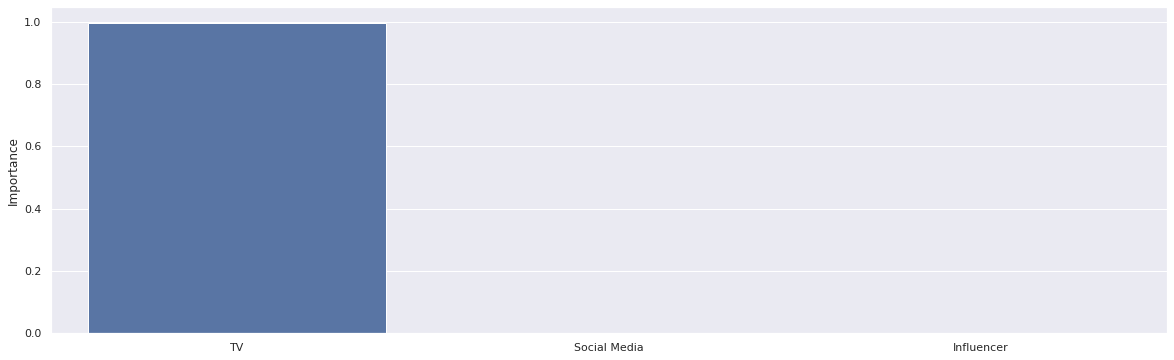

In [286]:
importances = final_model.feature_importances_

imp_df = pd.DataFrame(importances,columns=["Importance"],index = ['TV','Social Media','Influencer']).sort_values(by='Importance',ascending=False)


sns.set(rc={'figure.figsize':(20,6)})
sns.barplot(data=imp_df,x=imp_df.index,y='Importance');

In [287]:
imp_df

,Importance
TV,0.997177
Social Media,0.002472
Influencer,0.000351


## Hyperparameter Tuning

In [288]:
# Random grid
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['squared_error']}

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=50,verbose=2,random_state=100,n_jobs=-1)
rf_randomcv.fit(X, np.ravel(Y))

# Best parameters found in Random Search
print(rf_randomcv.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionW

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2.

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2.

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2.

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2.

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2.

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2.

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2.

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2.

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2.

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2.

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2.

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2.

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2.

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2.

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2.

{'n_estimators': 2000, 'min_samples_split': 14, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'mse'}


In [289]:
print(rf_randomcv.best_params_)

{'n_estimators': 2000, 'min_samples_split': 14, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'mse'}


In [290]:
rf = RandomForestRegressor(n_estimators = 2000, min_samples_split=14, min_samples_leaf=2, max_features='auto', max_depth=10, criterion='mse')

In [291]:
rf.fit(X,np.ravel(Y))

RandomForestRegressor(criterion='mse', max_depth=10, min_samples_leaf=2,
                      min_samples_split=14, n_estimators=2000)

In [292]:
y_pred_rf = rf.predict(x_test)

In [293]:
r2_score(y_test,y_pred_rf)

0.9975901078000379

In [294]:

## RMSE on Test data

np.sqrt(mean_squared_error(y_test,y_pred_rf))

4.720551100794709

In [295]:
y_pred_rf = pd.DataFrame(y_pred_rf)
y_pred_rf.columns=['Prediction']

In [296]:
comparison_df = pd.concat([y_pred_rf.set_index(y_test.index),y_test],axis=1)
display(comparison_df.head(10))

,Prediction,Sales
1218,74.817690,72.916447
2042,213.791096,212.487444
375,81.330271,82.711025
4440,93.122631,90.037708
2266,220.647959,223.269712
1469,48.633755,44.050968
2852,200.039200,197.273013
1920,308.632959,303.698983
2210,44.584079,46.542409
1651,211.072648,214.269115


In [297]:
## Saving the model
filename_rf = 'finalized_model_Random-Forest_after_tuning_outliers_removed.sav'
pickle.dump(final_model, open(filename_rf, 'wb'))


[CV] END criterion=mse, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END criterion=mse, max_depth=1000, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=1200; total time=   3.2s
[CV] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=2000; total time=   9.9s
[CV] END criterion=mse, max_depth=670, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=2000; total time=   5.5s
[CV] END criterion=mse, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   4.7s
[CV] END criterion=mse, max_depth=450, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END criterion=mse, max_depth=450, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END criterion=mse, max_depth=780, 

[CV] END criterion=mse, max_depth=1000, max_features=log2, min_samples_leaf=6, min_samples_split=14, n_estimators=1200; total time=   3.2s
[CV] END criterion=mse, max_depth=670, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=1600; total time=   4.1s
[CV] END criterion=mse, max_depth=340, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   2.7s
[CV] END criterion=mse, max_depth=340, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   0.8s
[CV] END criterion=mse, max_depth=670, max_features=log2, min_samples_leaf=6, min_samples_split=10, n_estimators=2000; total time=   5.4s
[CV] END criterion=mse, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   4.6s
[CV] END criterion=mse, max_depth=120, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   2.4s
[CV] END criterion=mse, max_depth=890, m

[CV] END criterion=mse, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.7s
[CV] END criterion=mse, max_depth=670, max_features=sqrt, min_samples_leaf=6, min_samples_split=2, n_estimators=1600; total time=   4.2s
[CV] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=14, n_estimators=2000; total time=   9.8s
[CV] END criterion=mse, max_depth=1000, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=1800; total time=   5.0s
[CV] END criterion=mse, max_depth=1000, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1400; total time=   4.5s
[CV] END criterion=mse, max_depth=450, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END criterion=mse, max_depth=450, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END criterion=mse, max_depth=780, ma

In [319]:
lasso_reg = Lasso()
lasso_reg.fit(X,Y)
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression()

In [321]:
## Saving Lasso Reg & Linear Reg models

pickle.dump(lasso_reg, open('finalized_model_Lasso_Reg.sav', 'wb'))
pickle.dump(lin_reg, open('finalized_model_Linear_Reg.sav', 'wb'))

In [311]:
## Saving the fitted Standard Scaler to use while predicitng.

from joblib import dump, load
dump(scaler, 'std_scaler.bin', compress=True)

['std_scaler.bin']

In [312]:
sc=load('std_scaler.bin')

In [313]:
a=x_test.copy()

In [314]:
a

array([[-1.27516911e+00, -7.82193427e-01,  1.33108106e+00],
       [ 2.32368060e-01,  9.14530398e-01, -1.34230558e+00],
       [-1.19785951e+00, -9.40292068e-01, -1.34230558e+00],
       ...,
       [ 4.39264878e-04,  2.63847605e-01,  4.39952183e-01],
       [-7.72656718e-01, -1.04957752e+00,  1.33108106e+00],
       [-1.35247871e+00, -9.29700860e-01,  4.39952183e-01]])

In [317]:
sc.transform(np.array([10,2,2]).reshape(1,-1))

/home/akash/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.68937115, -0.60411658, -0.44897565]])

In [316]:
np.array([10,2,2]).reshape(1,-1)

array([[10,  2,  2]])

In [308]:
filename_sc =  'std_scaler.sav'
pickle.dump(filename_sc, open(filename_sc, 'wb'))

In [309]:
 
# load the model from disk
loaded_sc = pickle.load(open(filename_sc, 'rb'))

### Saving the model

In [246]:
import pickle

In [59]:
# save the model to disk
filename = 'finalized_model_Random-Forest.sav'
pickle.dump(final_model, open(filename, 'wb'))



In [60]:
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
